In [11]:
import pandas as pd

results_numpy = pd.read_csv('data/results.csv', usecols=[0, 1, 2, 3])

results_pyarrow = pd.read_csv('data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [12]:
results_numpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.4+ MB


In [13]:
results_pyarrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB


In [14]:
results_pyarrow.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,<NA>,17.0,True,<NA>
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,<NA>,False,<NA>
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,<NA>,32.0,True,<NA>
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,<NA>
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,<NA>


In [15]:
import numpy as np
from pandas import pivot

results_pyarrow = results_pyarrow[results_pyarrow.noc.isin(['USA', 'CHN'])]
results_pyarrow = results_pyarrow.rename(columns={'noc': 'Country'})
pivot_table = results_pyarrow.pivot_table(index='year', columns='Country', values='place').sort_values(by='year', ascending=True)
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table.fillna(0)
pivot_table['better'] = np.where(
    (pivot_table['CHN'] == 0) | (pivot_table['USA'] == 0), 
    'No data', 
    np.where(pivot_table['CHN'] < pivot_table['USA'], 'USA', 'CHN')
)

pivot_table.tail()

Country,year,CHN,USA,better
32,2014.0,15.104478,14.341737,CHN
33,2016.0,10.789157,8.023384,CHN
34,2018.0,19.15748,15.312329,CHN
35,2020.0,10.789819,9.651777,CHN
36,2022.0,19.101045,12.423913,CHN


<Axes: title={'center': 'Best performance of China vs. United States'}, xlabel='Year', ylabel='Average Place'>

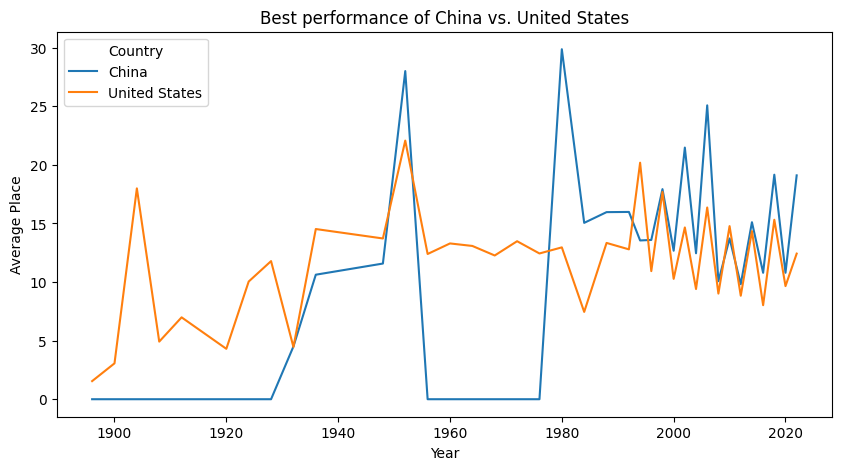

In [16]:
pivot_table = pivot_table.rename(columns={'CHN': 'China', 'USA': 'United States'})
pivot_table.plot(x='year', y=['China', 'United States'], kind='line', title='Best performance of China vs. United States', figsize=(10, 5), ylabel='Average Place', xlabel='Year')